# Housing Price Prediction Using Machine Learning

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing Data
Data = pd.read_csv('./Housing Price Prediction/Data.csv')
Data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
#getting some information about our Data-Set
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [3]:
# droping unnecessory featurs
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

In [4]:
# check if there are any Null values
Data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

C:\Users\yhtk0\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yhtk0\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


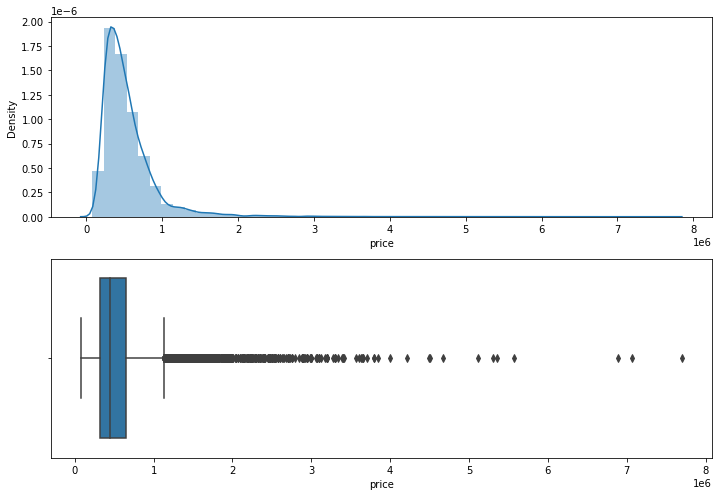

In [5]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
plt.tight_layout()

C:\Users\yhtk0\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yhtk0\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yhtk0\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

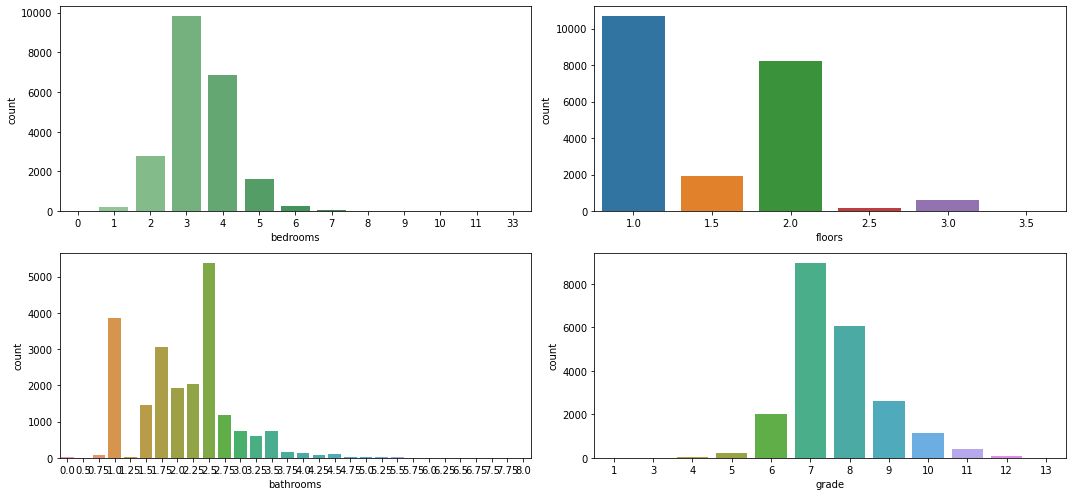

In [6]:
#visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(Data['bedrooms'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
sns.countplot(Data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(Data['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(Data['grade'])
plt.tight_layout()

C:\Users\yhtk0\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yhtk0\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yhtk0\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

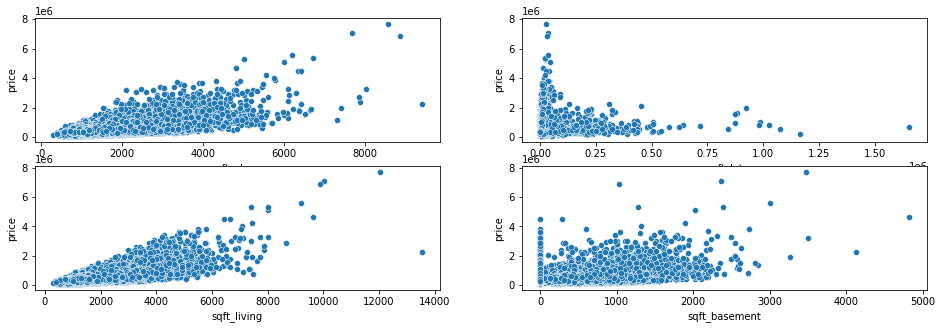

In [7]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'],Data['price'])

In [8]:
# check correlation
Data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64

In [9]:
#breaking date to years, months
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)
Data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:xlabel='year'>

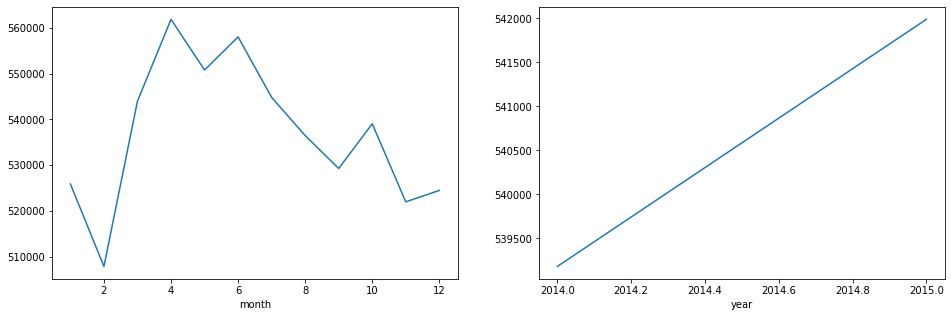

In [10]:
#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

In [11]:
# droping date column
Data = Data.drop('date',axis=1)
# Data = Data.drop('sqft_living15',axis=1)
# Data = Data.drop('sqft_lot15',axis=1)
# Data = Data.drop('sqft_above',axis=1)
# Data = Data.drop('sqft_basement',axis=1)
# Data = Data.drop('lat',axis=1)
# Data = Data.drop('long',axis=1)

# Scaling and Train Test Split

In [12]:
X = Data.drop('price',axis =1).values
y = Data['price'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [13]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# 1. Multiple Linear Regression

In [14]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([-3.23385471e+04,  2.83116835e+04, -4.56666323e+17,  6.37486684e+03,
        3.55462144e+03,  4.99525388e+04,  3.67765620e+04,  2.18347478e+04,
        1.15981831e+05,  4.12963928e+17,  2.18967009e+17, -7.28693491e+04,
        7.67583451e+03,  7.81665489e+04, -1.72703045e+04,  1.90466739e+04,
       -1.03206563e+04,  4.27523517e+03,  1.70724462e+04])

In [15]:
#predicting values on test data
y_pred = regressor.predict(X_test)

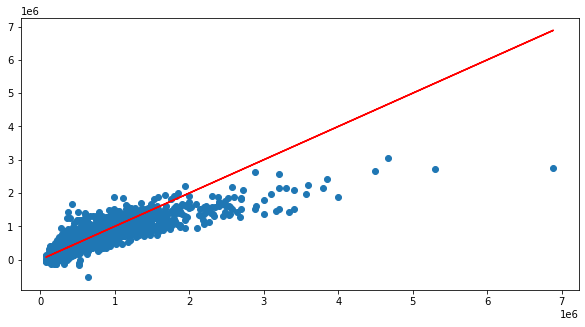

In [16]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

C:\Users\yhtk0\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

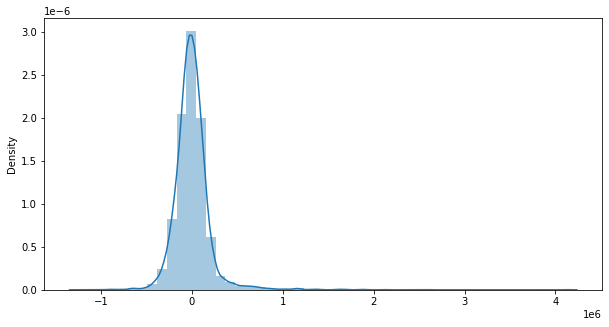

In [17]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [18]:
#compare actual output values with predicted values
df = pd.DataFrame({'Actual': y_test, 'Linear Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Linear Predicted
0,349950.0,530825.591524
1,450000.0,667540.493201
2,635000.0,552735.448611
3,355500.0,345460.264036
4,246950.0,61124.960412
5,406550.0,482228.860429
6,350000.0,312527.284135
7,226500.0,273629.407170
8,265000.0,281130.307457
9,656000.0,534137.392153


In [19]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 125911.31
Mean Squared Error:40599226250.68
Root Mean Squared Error:201492.50
Variance score is: 0.70


# 2. Keras Regression

In [20]:
# Creating a Neural Network Model
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [21]:
# having 19 nueron is based on the number of available featurs
# Creating a Neural Network
model = Sequential()

model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [22]:
#Training Model
model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test), batch_size=128, epochs=400)

Epoch 1/400
114/114 [==============================] - 4s 21ms/step - loss: 421402043151.5826 - val_loss: 428814106624.0000
Epoch 2/400
114/114 [==============================] - 0s 3ms/step - loss: 425872928447.4435 - val_loss: 423496515584.0000
Epoch 3/400
114/114 [==============================] - 0s 3ms/step - loss: 410840954933.4261 - val_loss: 340499595264.0000
Epoch 4/400
114/114 [==============================] - 0s 3ms/step - loss: 272993672717.3565 - val_loss: 101134090240.0000
Epoch 5/400
114/114 [==============================] - 0s 3ms/step - loss: 93431865415.2348 - val_loss: 67444506624.0000
Epoch 6/400
114/114 [==============================] - 0s 3ms/step - loss: 70808647733.4261 - val_loss: 60685152256.0000
Epoch 7/400
114/114 [==============================] - 0s 2ms/step - loss: 62450968415.7217 - val_loss: 56097042432.0000
Epoch 8/400
114/114 [==============================] - 0s 2ms/step - loss: 59044269367.6522 - val_loss: 52436697088.0000
Epoch 9/400
114/114 [==

Epoch 68/400
114/114 [==============================] - 0s 2ms/step - loss: 32432614729.4609 - val_loss: 31501883392.0000
Epoch 69/400
114/114 [==============================] - 0s 3ms/step - loss: 31367772587.4087 - val_loss: 31499520000.0000
Epoch 70/400
114/114 [==============================] - 0s 2ms/step - loss: 30861210864.4174 - val_loss: 31467335680.0000
Epoch 71/400
114/114 [==============================] - 0s 2ms/step - loss: 32948168436.8696 - val_loss: 31431145472.0000
Epoch 72/400
114/114 [==============================] - 0s 2ms/step - loss: 30702918290.9217 - val_loss: 31406811136.0000
Epoch 73/400
114/114 [==============================] - 0s 2ms/step - loss: 34664202133.1478 - val_loss: 31341500416.0000
Epoch 74/400
114/114 [==============================] - 0s 3ms/step - loss: 32630363554.5043 - val_loss: 31294494720.0000
Epoch 75/400
114/114 [==============================] - 0s 2ms/step - loss: 33839163676.9391 - val_loss: 31249383424.0000
Epoch 76/400
114/114 [==

Epoch 135/400
114/114 [==============================] - 0s 4ms/step - loss: 33434273489.2522 - val_loss: 29638825984.0000
Epoch 136/400
114/114 [==============================] - 0s 4ms/step - loss: 30596543532.5217 - val_loss: 29634557952.0000
Epoch 137/400
114/114 [==============================] - 0s 3ms/step - loss: 32495896665.0435 - val_loss: 29599281152.0000
Epoch 138/400
114/114 [==============================] - 0s 3ms/step - loss: 29871831770.1565 - val_loss: 29552861184.0000
Epoch 139/400
114/114 [==============================] - 0s 3ms/step - loss: 31695509860.1739 - val_loss: 29525641216.0000
Epoch 140/400
114/114 [==============================] - 0s 3ms/step - loss: 30495518078.8870 - val_loss: 29527867392.0000
Epoch 141/400
114/114 [==============================] - 0s 3ms/step - loss: 29811230176.8348 - val_loss: 29500989440.0000
Epoch 142/400
114/114 [==============================] - 0s 3ms/step - loss: 28419731171.0609 - val_loss: 29469016064.0000
Epoch 143/400
11

114/114 [==============================] - 0s 2ms/step - loss: 27527327156.3130 - val_loss: 28335482880.0000
Epoch 202/400
114/114 [==============================] - 0s 2ms/step - loss: 27686149120.0000 - val_loss: 28334987264.0000
Epoch 203/400
114/114 [==============================] - 0s 2ms/step - loss: 27600504707.3391 - val_loss: 28313790464.0000
Epoch 204/400
114/114 [==============================] - 0s 2ms/step - loss: 29120059213.9130 - val_loss: 28304289792.0000
Epoch 205/400
114/114 [==============================] - 0s 2ms/step - loss: 27667636437.7043 - val_loss: 28259469312.0000
Epoch 206/400
114/114 [==============================] - 0s 2ms/step - loss: 28370304329.4609 - val_loss: 28377937920.0000
Epoch 207/400
114/114 [==============================] - 0s 2ms/step - loss: 29245570226.0870 - val_loss: 28214872064.0000
Epoch 208/400
114/114 [==============================] - 0s 2ms/step - loss: 30122459634.6435 - val_loss: 28201435136.0000
Epoch 209/400
114/114 [=======

114/114 [==============================] - 0s 2ms/step - loss: 27906962066.9217 - val_loss: 27378059264.0000
Epoch 268/400
114/114 [==============================] - 0s 2ms/step - loss: 27389975365.0087 - val_loss: 27376443392.0000
Epoch 269/400
114/114 [==============================] - 0s 2ms/step - loss: 26557226010.7130 - val_loss: 27353372672.0000
Epoch 270/400
114/114 [==============================] - 0s 2ms/step - loss: 26893289578.8522 - val_loss: 27578617856.0000
Epoch 271/400
114/114 [==============================] - 0s 2ms/step - loss: 26957833349.5652 - val_loss: 27315484672.0000
Epoch 272/400
114/114 [==============================] - 0s 2ms/step - loss: 27639782266.4348 - val_loss: 27296053248.0000
Epoch 273/400
114/114 [==============================] - 0s 2ms/step - loss: 29305010603.4087 - val_loss: 27325763584.0000
Epoch 274/400
114/114 [==============================] - 0s 2ms/step - loss: 28138898084.7304 - val_loss: 27287257088.0000
Epoch 275/400
114/114 [=======

114/114 [==============================] - 0s 2ms/step - loss: 27142947350.2609 - val_loss: 26747027456.0000
Epoch 334/400
114/114 [==============================] - 0s 2ms/step - loss: 28112666802.0870 - val_loss: 26744262656.0000
Epoch 335/400
114/114 [==============================] - 0s 2ms/step - loss: 28652111729.5304 - val_loss: 26733266944.0000
Epoch 336/400
114/114 [==============================] - 0s 2ms/step - loss: 26448044566.2609 - val_loss: 26811265024.0000
Epoch 337/400
114/114 [==============================] - 0s 2ms/step - loss: 26524308328.6261 - val_loss: 26765842432.0000
Epoch 338/400
114/114 [==============================] - 0s 2ms/step - loss: 25689052703.1652 - val_loss: 26978070528.0000
Epoch 339/400
114/114 [==============================] - 0s 3ms/step - loss: 28281398761.7391 - val_loss: 26730524672.0000
Epoch 340/400
114/114 [==============================] - 0s 2ms/step - loss: 26994951782.4000 - val_loss: 26705178624.0000
Epoch 341/400
114/114 [=======

114/114 [==============================] - 0s 3ms/step - loss: 26654668978.0870 - val_loss: 26375204864.0000
Epoch 400/400
114/114 [==============================] - 0s 3ms/step - loss: 27060048352.8348 - val_loss: 26420412416.0000


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                260       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 14        
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
______________________________________________________

<AxesSubplot:>

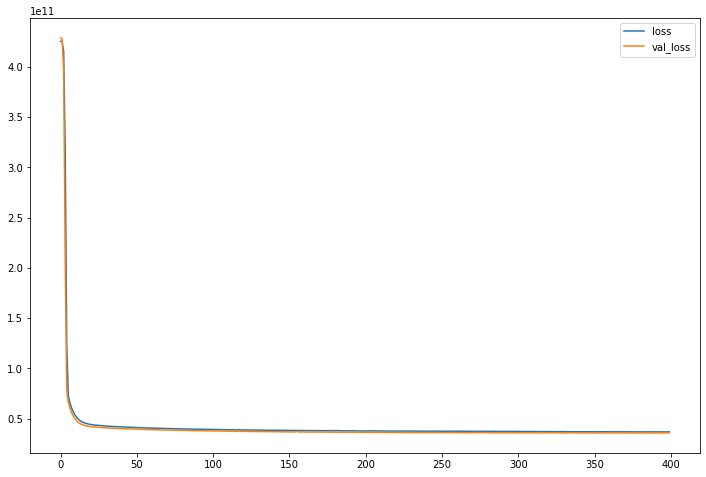

In [25]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [24]:
#predicting values on test data
y_predd = np.array(model.predict(X_test)).flatten()

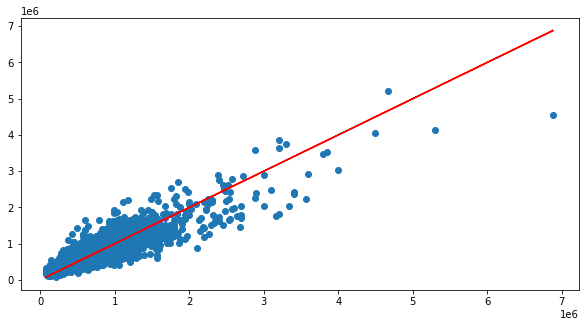

In [25]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_predd)
# Perfect predictions
plt.plot(y_test,y_test,'r')

C:\Users\yhtk0\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

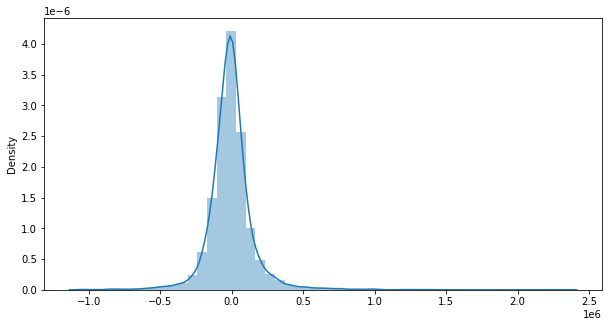

In [26]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

In [27]:
#compare actual output values with predicted values
df = pd.DataFrame({'Actual': y_test, 'Keras Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Keras Predicted
0,349950.0,559540.75000
1,450000.0,619178.56250
2,635000.0,606450.06250
3,355500.0,305351.71875
4,246950.0,285553.59375
5,406550.0,541057.25000
6,350000.0,391136.09375
7,226500.0,223742.31250
8,265000.0,269990.96875
9,656000.0,477172.75000


In [28]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 101794.10
Mean Squared Error:26420408202.09
Root Mean Squared Error:162543.56
Variance score is: 0.81


In [101]:
keras.backend.clear_session()

# Multiple Linear Regression Vs Keras Regression

In [29]:
print("----- Multiple Linear Regression -----")
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))
print("----- Keras Regression-----")
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

----- Multiple Linear Regression -----
Mean Absolute Error: 125911.31
Mean Squared Error:40599226250.68
Root Mean Squared Error:201492.50
Variance score is: 0.70
----- Keras Regression-----
Mean Absolute Error: 101794.10
Mean Squared Error:26420408202.09
Root Mean Squared Error:162543.56
Variance score is: 0.81


# Saving Model

In [ ]:
# Saving Model
model.save('housing_price_prediction_model.h5')

# Testing Model

In [ ]:
#testing model by using first house details in dataset
import keras
model = keras.models.load_model('housing_price_prediction_model.h5')
single_house = Data.drop('price',axis = 1).iloc[0]
Data.head()

In [104]:
from joblib import dump, load
info = [3,1,1180,5650,1,0,0,3,7,1180,0,1995,0,47.5112,-122.257,1340,5650,10,2014]
info = s_scaler.transform(np.array(info).reshape(-1,19))
print(info)
float(model.predict(info))
dump(s_scaler, 'std_scaler.bin', compress=True)

[[-0.4048978  -1.45181429 -0.9830231  -0.22099544 -0.9226315  -0.08709029
  -0.30802148 -0.6237001  -0.56138148 -0.73863867 -0.65709633  0.80938086
  -0.21167318 -0.34797434 -0.3091832  -0.94938066 -0.25521616  1.09358952
  -0.68996004]]


['std_scaler.bin']

In [ ]:
#pridected price of first house
single_house = s_scaler.transform(single_house.values.reshape(-1,19))
model.predict(single_house)